## Question 10 

What is the z score? 

$$
\mu = 100, \ \ \sigma = 15, \ \ X = 130 \\
Z = \dfrac{X - \mu}{\sigma} = 2
$$

## Question 11

What is the distribution of distance from initial to final position?

![image.png](https://i.postimg.cc/Y9r4Zydx/image.png)

$$
E(X - Y) = E(X) - E(Y) = 10 - 5 = 5 \\
Var(X-Y) = Var(X) + Var(Y) = \sigma_X^2 + \sigma_Y^2 = 1^2 + (0.5)^2 \\
\sigma_{X-Y} = \sqrt{Var(X-Y)} = 1.12
$$

In [4]:
from math import sqrt
s_r = sqrt(1**2 + 0.5**2)
s_r

1.118033988749895

## Question 12

![image.png](https://i.postimg.cc/gj414rnD/image.png)


**Ans**:  

$$
E(aX) = aE(X) = 2.54(70) = 177.8 \\
Var(aX) = a^2Var(X) = (2.54)^2(25) = 161.29 \\
$$

In [5]:
m = 2.54*70
v = ((2.54)**2)*25
m,v

(177.8, 161.29)

## Question 13

Note carefully. They are asking **CI for the probability**. 

![image.png](https://i.postimg.cc/Jh5WnjXT/image.png)

For a single Bernoulli trial, we could thus have an estimate as below from the 10000 trials. 

$$
\hat{p} = \dfrac{4950}{10000} = 0.4950 \\
\overline{x} = \hat{p} = 0.4950 \\
s = \sqrt{pq} = \sqrt{(0.495)(1-0.495)} = 0.4999
$$

In [47]:
p = 4950/10000
m = p
s = sqrt( 0.4950*(1-0.495)  )
s

0.49997499937496875

### Calculating Critical Value $z_{\frac{\alpha}{2}}$

If confidence level is 90\%, then significance level $\alpha$ is 10\%, thus respective Z value would be 1.645

In [8]:
def get_z(cl):
    #NOTE:returns right tailed area as that is mostly used in CI
    from scipy import stats
    alpha = round((1 - cl)/2,3)
    return (-1)*round(stats.norm.ppf(alpha),3)  # right tailing..

cl = 0.90
print(get_z(cl))

1.645


### Calculating CI

Since we are repeating for $n=10000$ trials, we expect a sampling distribution as below. Calculating CI for the same, 

$$\begin{aligned}
CI 
&= \overline{x} \pm z_{\frac{\alpha}{2}}\dfrac{s}{\sqrt{n}} \\
&= 0.4950 \pm 1.645\dfrac{0.4999}{\sqrt{10000}} \\
&= 0.4950 \pm 1.645(0.004999) \\
&= (0.4867, 0.5032)
\end{aligned}$$

In [50]:
0.4950 - 1.645*0.004999, 0.4950 + 1.645*0.004999

(0.486776645, 0.503223355)

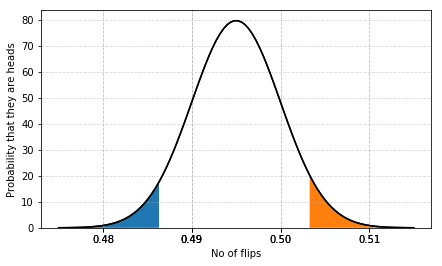

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
# from normalviz import draw_normal
import numpy as np
import matplotlib.mlab as mlab
import math
def draw_normal(ax, mu, sigma, cond=''):
    """
    cond: to shade the area meeting the condition
    """
    xstart = mu - 4*sigma
    xend = mu + 4*sigma
    x = np.linspace(xstart, xend, 100)
    y = mlab.normpdf(x, mu, sigma)
    ax.plot(x,y, color='black')
    
    # shade area satisfying the condition
    w = x[eval(cond)] if cond != '' else x
    w_shade = mlab.normpdf(w, mu, sigma)
    ax.fill_between(w, 0, w_shade)
    
    # set x axis in multiples of sigma
    x_ticks = []
    for step in range(-4,5): # 4 sigma on right, 4 on left, mu on middle
        x_tick = round(mu + (step)*sigma,2)
        x_ticks.append(x_tick)        
    ax.xaxis.set_ticks(x_ticks)
    ax.grid(True,  linestyle='--',alpha=0.5)
    
    ax.set_ylim(ymin=0) 

mu = 0.4950
sigma = 0.004999


# plot
fig, ax = plt.subplots(1,1, figsize=(7,4))
draw_normal(ax, mu, sigma, 'x<0.4867')  
draw_normal(ax, mu, sigma, 'x>0.5032')  
ax.set_xlabel('No of flips')
ax.set_ylabel('Probability that they are heads')
plt.show()

## Question 14

![image.png](https://i.postimg.cc/Jhn91S1h/image.png)

In [52]:
x = [0.79,0.70,0.73,0.66,0.65,0.70,0.74,0.81,0.71,0.70]

n = len(x)
xb = sum(x)/n
v = sum([ (i - xb)**2 for i in x ] )/n
s =sqrt(v)
xb, s

(0.719, 0.048259714048054625)

In [53]:
se = 1.96*(s/sqrt(n))
xb - se, xb + se

(0.6890883193384256, 0.7489116806615743)

## Question 15

Calculate slope and y-intercept for given data. 

![image.png](https://i.postimg.cc/VvqtHYHZ/image.png)

In [54]:
x = [0,1,2]
y = [0,2,2]


# means
n = len(x)  # also could use len(Y) as its pairs
x_b, y_b = sum(x)/n, sum(y)/n

b_1 = sum([(i[0] - x_b)*(i[1] - y_b) for i in zip(x,y)])/ sum([(i - x_b)**2 for i in x])
b_0 = y_b - b_1*x_b

b_0, b_1

(0.33333333333333326, 1.0)

## Question 16

Rank the $r$ from 1 to 4

![image](https://i.postimg.cc/FzHvwpPt/image.png)